# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv("/content/data_clustering_inverse.csv")

In [3]:
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,BalanceBin,AmountBin,Target
0,14.09,Debit,ATM,70.0,Doctor,81.0,1.0,5112.21,High,Low,0
1,376.24,Debit,ATM,68.0,Doctor,141.0,1.0,13758.91,Very High,High,2
2,126.29,Debit,Online,19.0,Student,56.0,1.0,1122.35,Low,Medium,3
3,184.50,Debit,Online,26.0,Student,25.0,1.0,8569.06,Very High,Medium,2
4,13.45,Credit,Online,45.0,Student,198.0,1.0,7429.40,High,Low,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Channel              2512 non-null   object 
 3   CustomerAge          2512 non-null   float64
 4   CustomerOccupation   2512 non-null   object 
 5   TransactionDuration  2512 non-null   float64
 6   LoginAttempts        2512 non-null   float64
 7   AccountBalance       2512 non-null   float64
 8   BalanceBin           2512 non-null   object 
 9   AmountBin            2512 non-null   object 
 10  Target               2512 non-null   int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 216.0+ KB


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
y = df['Target']

columns_to_drop = ['Target', 'TransactionAmount', 'AccountBalance']
x = df.drop(columns=columns_to_drop)

x.info()

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nJumlah x_train: {x_train.shape[0]}")
print(f"Jumlah x_test : {x_test.shape[0]}")
print(f"Jumlah y_train: {y_train.shape[0]}")
print(f"Jumlah y_test : {y_test.shape[0]}")

print("\nDistribusi Target di y_train:")
print(y_train.value_counts(normalize=True).sort_index())

print("\nDistribusi Target di y_test:")
print(y_test.value_counts(normalize=True).sort_index())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionType      2512 non-null   object 
 1   Channel              2512 non-null   object 
 2   CustomerAge          2512 non-null   float64
 3   CustomerOccupation   2512 non-null   object 
 4   TransactionDuration  2512 non-null   float64
 5   LoginAttempts        2512 non-null   float64
 6   BalanceBin           2512 non-null   object 
 7   AmountBin            2512 non-null   object 
dtypes: float64(3), object(5)
memory usage: 157.1+ KB

Jumlah x_train: 2009
Jumlah x_test : 503
Jumlah y_train: 2009
Jumlah y_test : 503

Distribusi Target di y_train:
Target
0    0.265804
1    0.143853
2    0.206073
3    0.253360
4    0.130911
Name: proportion, dtype: float64

Distribusi Target di y_test:
Target
0    0.266402
1    0.143141
2    0.204771
3    0.254473
4    0.131213
Name: pro

# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

========== Evaluasi Model Decision Tree ==========

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       134
           1       0.87      0.90      0.88        72
           2       0.76      0.75      0.75       103
           3       0.91      0.88      0.89       128
           4       0.58      0.59      0.59        66

    accuracy                           0.82       503
   macro avg       0.80      0.80      0.80       503
weighted avg       0.82      0.82      0.82       503



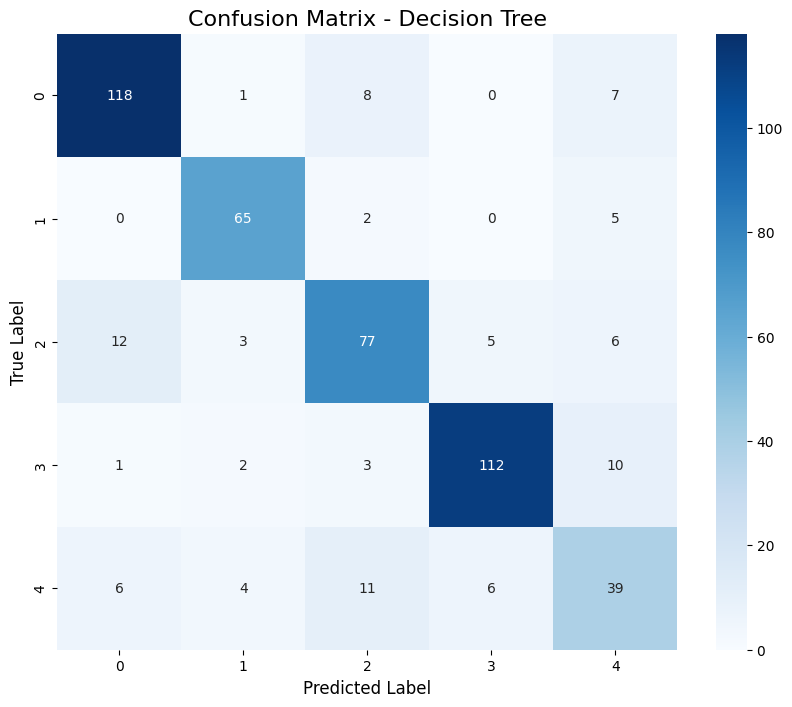

In [6]:
numeric_features = ['CustomerAge', 'TransactionDuration', 'LoginAttempts']

categorical_features = [
    'TransactionType',
    'Channel',
    'CustomerOccupation',
    'BalanceBin',
    'AmountBin'
]

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

model_dt.fit(x_train, y_train)

print("========== Evaluasi Model Decision Tree ==========\n")

y_pred = model_dt.predict(x_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=model_dt.classes_,
            yticklabels=model_dt.classes_)

plt.title('Confusion Matrix - Decision Tree', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

In [7]:
joblib.dump(model_dt, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [8]:
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

model_rf.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CustomerAge',
                                                   'TransactionDuration',
                                                   'LoginAttempts']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['TransactionType', 'Channel',
                                                   'CustomerOccupation',
                                                   'BalanceBin',
                                                   'AmountBin'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

========== Evaluasi Model Random Forest ==========

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       134
           1       0.84      0.89      0.86        72
           2       0.74      0.82      0.78       103
           3       0.90      0.86      0.88       128
           4       0.60      0.58      0.59        66

    accuracy                           0.81       503
   macro avg       0.79      0.80      0.79       503
weighted avg       0.81      0.81      0.81       503



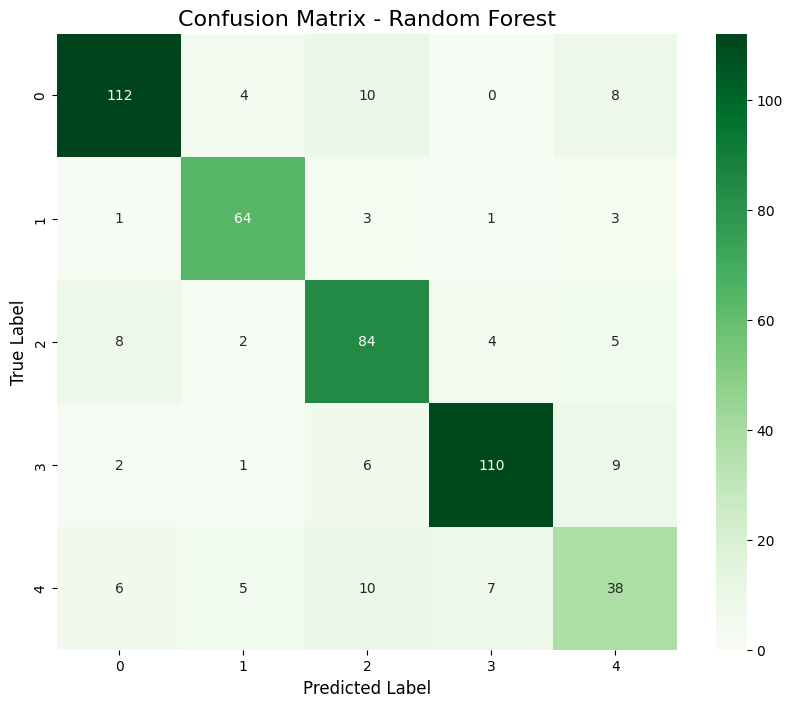

In [9]:
print("========== Evaluasi Model Random Forest ==========\n")

y_pred_rf = model_rf.predict(x_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf,
            annot=True,
            fmt='d',
            cmap='Greens',
            xticklabels=model_rf.classes_,
            yticklabels=model_rf.classes_)

plt.title('Confusion Matrix - Random Forest', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

In [10]:
joblib.dump(model_rf, 'explore_random_forest_classification.h5')

['explore_random_forest_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [11]:
param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10, 15],
    'classifier__min_samples_leaf': [1, 2, 4, 6]
}

grid_search_dt = GridSearchCV(
    estimator=model_dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_dt.fit(x_train, y_train)

print(f"\nSkor Akurasi CV Terbaik: {grid_search_dt.best_score_:.4f}")
print("\nParameter Terbaik:")
print(grid_search_dt.best_params_)

model_dt_tuned = grid_search_dt.best_estimator_

Fitting 5 folds for each of 160 candidates, totalling 800 fits

Skor Akurasi CV Terbaik: 0.8437

Parameter Terbaik:
{'classifier__criterion': 'gini', 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}


========== Evaluasi Model Decision Tree (Tuned) ==========

=== Classification Report (Tuned) ===
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       134
           1       0.88      0.89      0.88        72
           2       0.75      0.88      0.81       103
           3       0.89      0.91      0.90       128
           4       0.63      0.50      0.56        66

    accuracy                           0.83       503
   macro avg       0.81      0.81      0.81       503
weighted avg       0.83      0.83      0.83       503



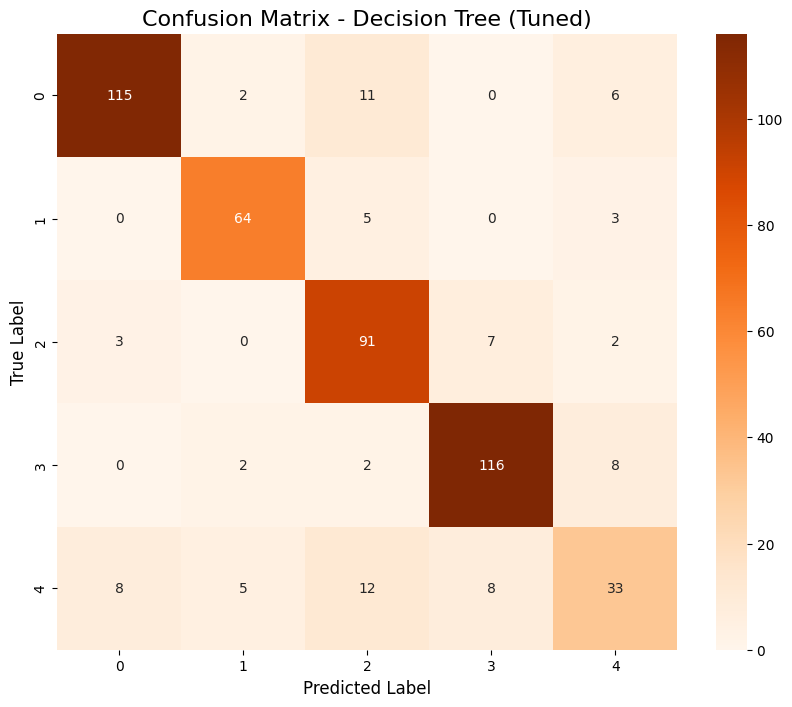

In [12]:
print("========== Evaluasi Model Decision Tree (Tuned) ==========\n")

y_pred_tuned = model_dt_tuned.predict(x_test)

print("=== Classification Report (Tuned) ===")
print(classification_report(y_test, y_pred_tuned))

cm_tuned = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_tuned,
            annot=True,
            fmt='d',
            cmap='Oranges',
            xticklabels=model_dt_tuned.classes_,
            yticklabels=model_dt_tuned.classes_)

plt.title('Confusion Matrix - Decision Tree (Tuned)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

In [13]:
joblib.dump(model_dt_tuned, 'tuning_classification.h5')

['tuning_classification.h5']

End of Code